# (Fordgo bike data exploration)
## by (Omnia Imam)


## Investigation Overview

> How long does the average trip take?, and does that depend on if a user is a subscriber or customer? How can some other variables be relevant; (such as gender of that user, or maybe their age..! )

## Dataset Overview

>This document explores a dataset including information about individual rides made in a bike-sharing system covering the greater San FranciscoBay area.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.drop(['start_station_id','start_station_name','end_station_id','end_station_name','start_station_latitude', 'start_station_longitude', 'end_station_latitude','end_station_longitude'], axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
df1= df.copy()
df1['end_time']= pd.to_datetime(df1['end_time'])
df1['start_time']= pd.to_datetime(df1['start_time'])

df1['diff']= df1['end_time'] - df1['start_time']

df1['member_age'] = 2019-df1['member_birth_year'].astype('int')
df1.drop('member_birth_year', axis=1, inplace=True)

df1['mins_diff']=df1['diff'].astype('timedelta64[m]')


In [ ]:
df1.info(), df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             175147 non-null  int64          
 1   start_time               175147 non-null  datetime64[ns] 
 2   end_time                 175147 non-null  datetime64[ns] 
 3   bike_id                  175147 non-null  int64          
 4   user_type                175147 non-null  object         
 5   member_gender            175147 non-null  object         
 6   bike_share_for_all_trip  175147 non-null  object         
 7   diff                     175147 non-null  timedelta64[ns]
 8   member_age               175147 non-null  int32          
 9   mins_diff                175147 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(3), timedelta64[ns](1)
memory usage: 14.0+ MB


(None,
 duration_sec               0
 start_time                 0
 end_time                   0
 bike_id                    0
 user_type                  0
 member_gender              0
 bike_share_for_all_trip    0
 diff                       0
 member_age                 0
 mins_diff                  0
 dtype: int64)

In [ ]:
df1.head(1)

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,diff,member_age,mins_diff
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,Male,No,0 days 14:29:45.830000,35,869.0


## Univariate Exploration



### 1- Distribution of durations of rides in minutes- (Histogram)


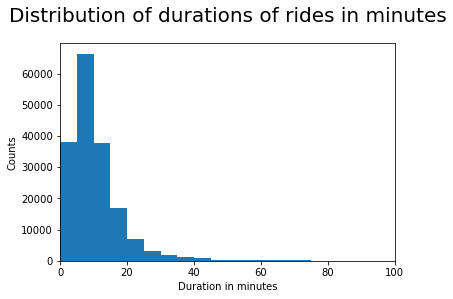

In [ ]:
bins = np.arange(0,df1.mins_diff.max()+5,5)
plt.hist(data=df1, x= 'mins_diff', bins=bins);
plt.title('Distribution of durations of rides in minutes',fontsize=20, y=1.07)
plt.xlabel('Duration in minutes')
plt.ylabel('Counts')
plt.xlim(0,100);

* The majority of rides do not exceed 20 mins; do not even reach them, with **average time duration of 11.49 minutes..**
* our plot is right skewed which indicates that **with the increasement of durations, number of riders tends to decrease..**


### 2- Which days of the week are most likely to have more reservations recorded on- (Barchart)

In [ ]:
df1['day']=df1['start_time'].dt.day_name()
df1.head(1)

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,diff,member_age,mins_diff,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,Male,No,0 days 14:29:45.830000,35,869.0,Thursday


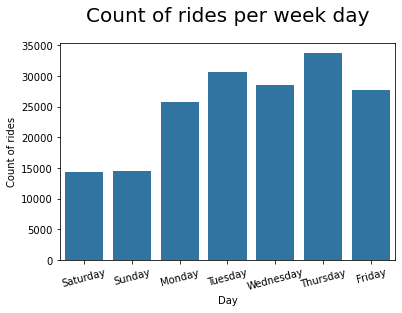

In [ ]:
base_color= sb.color_palette()[0]
order= ['Saturday', 'Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday']
cat= pd.api.types.CategoricalDtype(ordered=True, categories=order)
df1['day']=df1['day'].astype(cat);

sb.countplot(data = df1, x = 'day',color = base_color);
plt.title('Count of rides per week day', fontsize = 20, y=1.07)
plt.xlabel('Day')
plt.ylabel('Count of rides');
plt.xticks(rotation=15);

The **majority of rides** are on reserved on (**Thursday** and **Tuesday**, respectively) , then on Wednesday, Friday and Monday, While having **Saturday and Sunday with the least frequencies of reservations..**

### 3- Distribution of members' types- (PieChart)



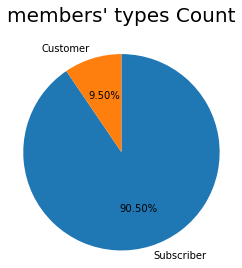

In [ ]:
type_order= df1['user_type'].value_counts() 
plt.pie(type_order, labels = type_order.index, autopct= '%0.2f%%' , startangle = 90, counterclock = False);
plt.title("members' types Count", fontsize = 20, y=1.07 )
plt.axis('square');

Generally, the **higher proportion** of bike-riders are **subscribers**..

### 4- Distribution of members' genders- (Barchart)

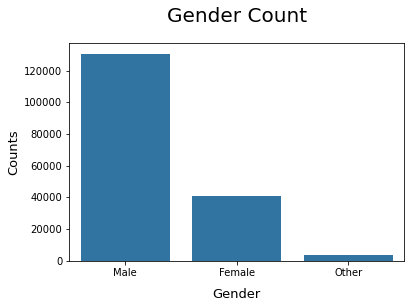

In [ ]:
gender_order= df1['member_gender'].value_counts().index 
base_color=sb.color_palette()[0]
sb.countplot(data = df1, x = 'member_gender',color=base_color, order= gender_order)
plt.title("Gender Count", fontsize=20, y=1.07)
plt.xlabel('Gender',fontsize=13,labelpad=10)
plt.ylabel('Counts', fontsize=13);

**Male** bike-riders are much **more than females and others**..

### 5- Distribution of members' Ages- (Histogram with gaps)

In [ ]:
df1.drop(df1[df1['member_age'] >= 100].index, inplace = True)

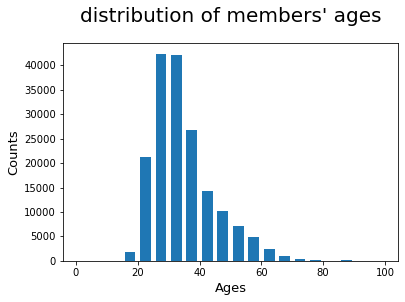

In [ ]:
bin_edges = np.arange(0, df1['member_age'].max()+5, 5)
plt.hist(data=df1, x='member_age', bins = bin_edges, rwidth = 0.7);
plt.title("distribution of members' ages", fontsize=20, y=1.07)
plt.xlabel('Ages', fontsize=13)
plt.ylabel('Counts',fontsize=13);

In [ ]:
df1['member_age'].mean()

34.158777666714265

**Most of the distribution** fall within the range of **20-40** years old members, with **mean value of 34.16 years old** and we can also notice that our graph is considered right skewed; meaning that number of riders decreases as their ages increase..

## Bivariate Exploration


### 1- **First of all, let's have a look at the relationship between types of users and time they spend riding bikes**


Text(0, 0.5, 'Duration in minutes')

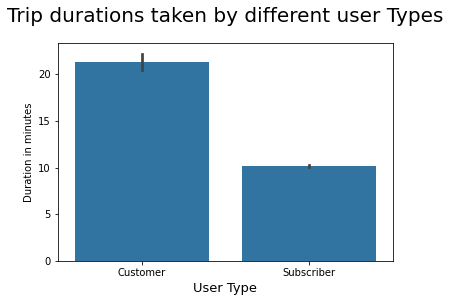

In [ ]:
colors= sb.color_palette()[0]
sb.barplot(data=df1, x='user_type', y='mins_diff', color= colors);
plt.title('Trip durations taken by different user Types', fontsize=20, y=1.07)
plt.xlabel('User Type', fontsize= 13)
plt.ylabel('Duration in minutes')

On average, **Customers spend more Time riding bikes than subscribers**

### 2- **Let's now have a look at the relationship between types of users and days of week they mostly reserve rides on**


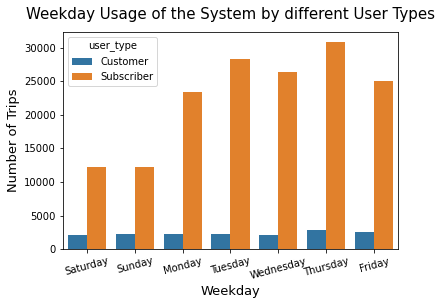

In [ ]:
sb.countplot(data = df1, x = 'day', hue = 'user_type');
plt.xticks(rotation=15);
plt.title('Weekday Usage of the System by different User Types', y=1.03, fontsize=15);
plt.xlabel('Weekday', fontsize=13)
plt.ylabel('Number of Trips',fontsize=13);

Subscribers are much more than customers, and **"Thursday" is still the most frequent day** of reserving rides for both types, followed by **"Friday" for customers**, and **"Tuesday" for subscribers**..

### 3- **Now let's see the relationship between week days and trip duration**


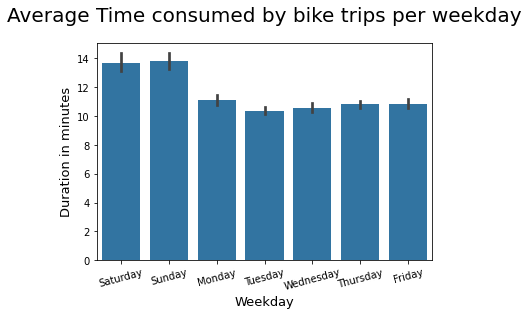

In [ ]:
sb.barplot(data=df1, x='day', y='mins_diff', color=base_color);
plt.xticks(rotation=15);
plt.title('Average Time consumed by bike trips per weekday',fontsize=20, y=1.07)
plt.xlabel('Weekday',fontsize=13)
plt.ylabel('Duration in minutes', fontsize=13);

**"Sunday"** is the day with the **highest average of trip durations** in minutes, **followed by "Saturday"**, then **"Monday"**. The rest of week days are so close in average durations

### 4- **Is there a relationship between members' genders and trips durations?**

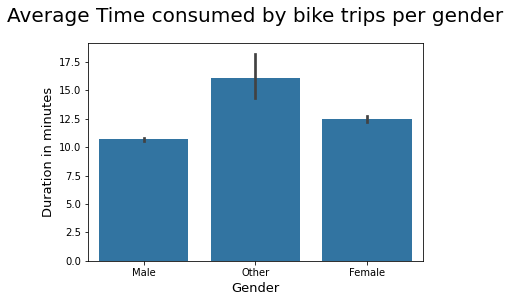

In [ ]:
sb.barplot(data=df1, x='member_gender', y='mins_diff', color=base_color);
plt.title('Average Time consumed by bike trips per gender',fontsize=20, y=1.07)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('Duration in minutes', fontsize=13);

**"Other"** gender seems to spend the **highest average of time duration** in riding bikes, **followed by females**, then males.

### 5- **Is there a relationship between members' ages and trip durations?**

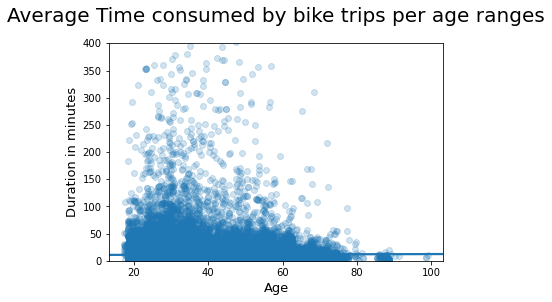

In [ ]:
sb.regplot(data = df1, x = 'member_age', y = 'mins_diff', truncate=False, x_jitter=0.7,scatter_kws={'alpha':1/5});
plt.ylim(0,400);
plt.title('Average Time consumed by bike trips per age ranges',fontsize=20, y=1.07)
plt.xlabel('Age',fontsize=13)
plt.ylabel('Duration in minutes', fontsize=13);

#### Verifying by a Heatmap:

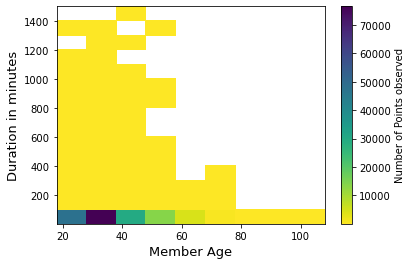

In [ ]:
bins_x= np.arange(18,99+10, 10 )
bins_y= np.arange(1, 1409+100, 100)

h2d= plt.hist2d(data= df1, x= 'member_age', y ='mins_diff', cmap='viridis_r', cmin=0.5, bins = [bins_x, bins_y]);
plt.colorbar(label='Number of Points observed');
plt.xlabel('Member Age', fontsize=13)
plt.ylabel('Duration in minutes', fontsize=13);

We can observe from both the scatter plot and heat map that **most frequent** bike riders are aged **between 20 and 60**. And that **Higher durations are mostly observed with younger members**.

## Multivariate Exploration


### 1- **Relationship between member age , gender and trip duration**

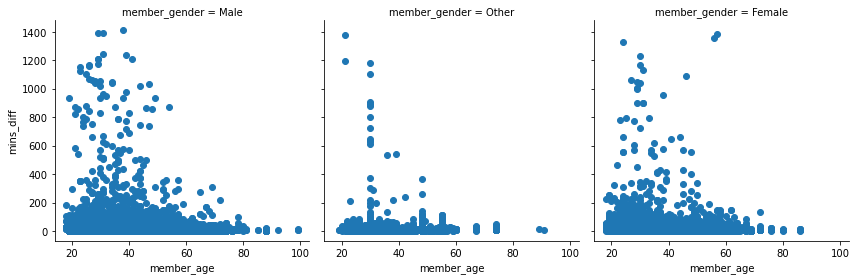

In [ ]:
g = sb.FacetGrid(data = df1, col = 'member_gender', size = 4);
g.map(plt.scatter, 'member_age', 'mins_diff');

>**Higher durations** are occupied by **ages mostly less than 60** .

>On average,"**Other**" gender is considered the **lowest aged** riding bikes gender , followed by **Females** then Males.

>There's no really obvious effect on duration based on gender, Except that there are **more data points of males of ages less than 50, that were observed to have spent high durations of time**..

### 2- **Relationship between user type, gender and weekday usage.**

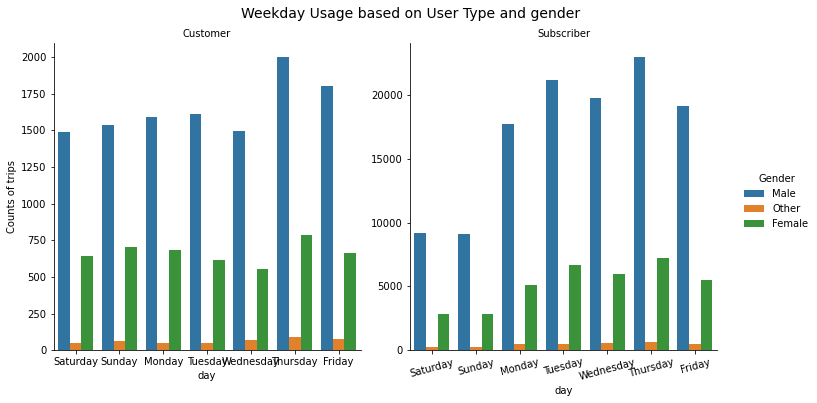

In [ ]:
g = sb.catplot(data=df1, x='day', col="user_type",hue='member_gender', sharey = False, kind='count', order = order)
plt.xticks(rotation=15);
g.set_axis_labels("day", "Counts of trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage based on User Type and gender', y=1.03, fontsize=14);
g._legend.set_title('Gender');

> We can clearly observe that generally, **subscribers are much more than customers**, and **males are making more bike trips** than females and others; as a nature result of the higher number of males and subscribers in the program.

>"**Thursday**" is still **the most frequent day of reserving rides for both types**, followed by **"Friday" for customers**, and **"Tuesday" for subscribers**. 

> We can also notice that unlike subscribers, **customers** of all genders often **use the service on "Saturdays" and "Sundays"** compared to their use of it on rest of the days. **Subscribers scarcely use it on these days**..


### In Conclusion,  regarding our features of interest (**user_type, average trip duration**):

>* The majority of rides do not exceed 20 mins; with **average time duration of 11.49 minutes**. 
>* With the **increasement** of trip **durations** ,**number of riders** tends to **decrease**.

>* **most users are subscribers** ,They both prefer using the Bikeshare on **Thursdays**, followed by **"Friday" for customers**, and **"Tuesday" for subscribers**.

>* **customers take longer ride duarations** than subscribers.

>* **higher durations** are occupied by ages mostly **less than 60** .

>* gender almost has no effect on the data compared to age and user_type, except that **number of males** is generally **higher** than females and others..

In [ ]:
#!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input
jupyter nbconvert presentation.ipynb --to slides --template output-toggle.tpl
--post serve

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 853205 bytes to slide_deck_template.slides.html
